Using Pandas and Numpy with Data
--

First, we'll need to import the libraries.

In [40]:
import pandas as pd
import numpy as np

This is an example of how to read a table from Wikipedia, harvest some data, and change it around so that it reads well for NumPy and Pandas.

This first entry describes the read_html function from the Pandas library.

In [41]:
# pd.read_html?
episodes = pd.read_html(r'https://en.wikipedia.org/wiki/Parks_and_Recreation_%28season_2%29',header=0)
episodes
# also, uhoh...

[         Parks and Recreation (season 2)  \
 0                          DVD cover art   
 1                               Starring   
 2                      Country of origin   
 3                        No. of episodes   
 4                                Release   
 5                       Original network   
 6                       Original release   
 7                      Season chronology   
 8    ← Previous Season 1 Next → Season 3   
 9  List of Parks and Recreation episodes   
 
                                           Unnamed: 1  
 0                                                NaN  
 1  Amy Poehler Rashida Jones Paul Schneider Aziz ...  
 2                                      United States  
 3                                                 24  
 4                                                NaN  
 5                                                NBC  
 6  September 17, 2009 (2009-09-17) – May 20, 2010...  
 7                                                NaN  

Above, we've passed two arguments to the pd.read_html() method. First, we're passing the URL. Pandas will use other installed libraries to connect to this URL and begin extracting the tables as a list. Notice the '[' at the beginning, and the ']' all the way at the end? That should be an indication that it is a list.  Of course you could always:

In [42]:
type(episodes)

list

Since it is a list, it can be sliced. We just need to figure out which slice we want. Is it the first one? (remember, Python is zero-indexed.)

In [43]:
episodes[0]

,Parks and Recreation (season 2),Unnamed: 1
0,DVD cover art,NaN
1,Starring,Amy Poehler Rashida Jones Paul Schneider Aziz ...
2,Country of origin,United States
3,No. of episodes,24
4,Release,NaN
5,Original network,NBC
6,Original release,"September 17, 2009 (2009-09-17) – May 20, 2010..."
7,Season chronology,NaN
8,← Previous Season 1 Next → Season 3,NaN
9,List of Parks and Recreation episodes,NaN


While we could do some things with this, this table isn't the full data we're looking to process. For this page, we're looking at the second table, or episodes[1]. We'll go ahead and assign that to a variable we're calling 'season'.

In [44]:
season = episodes[1]
season

,No. overall,No. in season,Title,Directed by,Written by,Original air date,U.S. viewers (millions)
0,7,1,"""Pawnee Zoo""",Paul Feig,Norm Hiscock,"September 17, 2009",5.00[1]
1,"In order to promote the Pawnee Zoo, Leslie (Am...",NaN,NaN,NaN,NaN,NaN,NaN
2,8,2,"""The Stakeout""",Seth Gordon,Rachel Axler,"September 24, 2009",4.22[2]
3,"While taking care of the new community garden,...",NaN,NaN,NaN,NaN,NaN,NaN
4,9,3,"""Beauty Pageant""",Jason Woliner,Katie Dippold,"October 1, 2009",4.63[3]
5,Leslie will be judging the annual Miss Pawnee ...,NaN,NaN,NaN,NaN,NaN,NaN
6,10,4,"""Practice Date""",Alex Hardcastle,Harris Wittels,"October 8, 2009",4.97[4]
7,"Her first date with Dave is approaching fast, ...",NaN,NaN,NaN,NaN,NaN,NaN
8,11,5,"""Sister City""",Michael Schur,Alan Yang,"October 15, 2009",4.69[5]
9,Leslie plays host to the visiting party from t...,NaN,NaN,NaN,NaN,NaN,NaN


Notice here that there are a bunch of cells with 'NaN' in them. We talked about 'Not a Number' before, and again NumPy issaying that it couldn't find or interpret data here. We could use some Pandas functions to deal with these cells.

In [45]:
season.dropna()

,No. overall,No. in season,Title,Directed by,Written by,Original air date,U.S. viewers (millions)
0,7,1,"""Pawnee Zoo""",Paul Feig,Norm Hiscock,"September 17, 2009",5.00[1]
2,8,2,"""The Stakeout""",Seth Gordon,Rachel Axler,"September 24, 2009",4.22[2]
4,9,3,"""Beauty Pageant""",Jason Woliner,Katie Dippold,"October 1, 2009",4.63[3]
6,10,4,"""Practice Date""",Alex Hardcastle,Harris Wittels,"October 8, 2009",4.97[4]
8,11,5,"""Sister City""",Michael Schur,Alan Yang,"October 15, 2009",4.69[5]
10,12,6,"""Kaboom""",Charles McDougall,Aisha Muharrar,"October 22, 2009",4.98[6]
12,13,7,"""Greg Pikitis""",Dean Holland,Michael Schur,"October 29, 2009",4.96[7]
14,14,8,"""Ron and Tammy""",Troy Miller,Mike Scully,"November 5, 2009",4.94[8]
16,15,9,"""The Camel""",Millicent Shelton,Rachel Axler,"November 12, 2009",4.67[9]
18,16,10,"""Hunting Trip""",Greg Daniels,Daniel J. Goor,"November 19, 2009",4.61[10]


The .dropna() method effectively drops any rows where there are one or more NaN entries. Unfortunately, while the rows were mostly NaN, there were some cells with data in them. By default, .dropna() has the argument **how='any'**. Meaning, if a row contains one or more NaN, then .dropna() will drop it. Instead, we can use .dropna(how='all'). This will only drop rows where all cells are NaN.

In [46]:
season.dropna(how='all')

,No. overall,No. in season,Title,Directed by,Written by,Original air date,U.S. viewers (millions)
0,7,1,"""Pawnee Zoo""",Paul Feig,Norm Hiscock,"September 17, 2009",5.00[1]
1,"In order to promote the Pawnee Zoo, Leslie (Am...",NaN,NaN,NaN,NaN,NaN,NaN
2,8,2,"""The Stakeout""",Seth Gordon,Rachel Axler,"September 24, 2009",4.22[2]
3,"While taking care of the new community garden,...",NaN,NaN,NaN,NaN,NaN,NaN
4,9,3,"""Beauty Pageant""",Jason Woliner,Katie Dippold,"October 1, 2009",4.63[3]
5,Leslie will be judging the annual Miss Pawnee ...,NaN,NaN,NaN,NaN,NaN,NaN
6,10,4,"""Practice Date""",Alex Hardcastle,Harris Wittels,"October 8, 2009",4.97[4]
7,"Her first date with Dave is approaching fast, ...",NaN,NaN,NaN,NaN,NaN,NaN
8,11,5,"""Sister City""",Michael Schur,Alan Yang,"October 15, 2009",4.69[5]
9,Leslie plays host to the visiting party from t...,NaN,NaN,NaN,NaN,NaN,NaN


This doesn't show anything here, as we don't have any rows that are completely filled with NaN. But, we can use .fillna() to automatically change that value to something else that may be relevant to your data collection methods.

In [47]:
season.fillna(-999)

,No. overall,No. in season,Title,Directed by,Written by,Original air date,U.S. viewers (millions)
0,7,1,"""Pawnee Zoo""",Paul Feig,Norm Hiscock,"September 17, 2009",5.00[1]
1,"In order to promote the Pawnee Zoo, Leslie (Am...",-999,-999,-999,-999,-999,-999
2,8,2,"""The Stakeout""",Seth Gordon,Rachel Axler,"September 24, 2009",4.22[2]
3,"While taking care of the new community garden,...",-999,-999,-999,-999,-999,-999
4,9,3,"""Beauty Pageant""",Jason Woliner,Katie Dippold,"October 1, 2009",4.63[3]
5,Leslie will be judging the annual Miss Pawnee ...,-999,-999,-999,-999,-999,-999
6,10,4,"""Practice Date""",Alex Hardcastle,Harris Wittels,"October 8, 2009",4.97[4]
7,"Her first date with Dave is approaching fast, ...",-999,-999,-999,-999,-999,-999
8,11,5,"""Sister City""",Michael Schur,Alan Yang,"October 15, 2009",4.69[5]
9,Leslie plays host to the visiting party from t...,-999,-999,-999,-999,-999,-999


.fillna() has multiple methods, like forward fill, backward fill, interpolation.

In [48]:
#season.fillna?

In [49]:
season.fillna(method='ffill')

,No. overall,No. in season,Title,Directed by,Written by,Original air date,U.S. viewers (millions)
0,7,1,"""Pawnee Zoo""",Paul Feig,Norm Hiscock,"September 17, 2009",5.00[1]
1,"In order to promote the Pawnee Zoo, Leslie (Am...",1,"""Pawnee Zoo""",Paul Feig,Norm Hiscock,"September 17, 2009",5.00[1]
2,8,2,"""The Stakeout""",Seth Gordon,Rachel Axler,"September 24, 2009",4.22[2]
3,"While taking care of the new community garden,...",2,"""The Stakeout""",Seth Gordon,Rachel Axler,"September 24, 2009",4.22[2]
4,9,3,"""Beauty Pageant""",Jason Woliner,Katie Dippold,"October 1, 2009",4.63[3]
5,Leslie will be judging the annual Miss Pawnee ...,3,"""Beauty Pageant""",Jason Woliner,Katie Dippold,"October 1, 2009",4.63[3]
6,10,4,"""Practice Date""",Alex Hardcastle,Harris Wittels,"October 8, 2009",4.97[4]
7,"Her first date with Dave is approaching fast, ...",4,"""Practice Date""",Alex Hardcastle,Harris Wittels,"October 8, 2009",4.97[4]
8,11,5,"""Sister City""",Michael Schur,Alan Yang,"October 15, 2009",4.69[5]
9,Leslie plays host to the visiting party from t...,5,"""Sister City""",Michael Schur,Alan Yang,"October 15, 2009",4.69[5]


while .fillna() is useful, the information contained in surrounding cells isn't that useful to us. It appears that in the case of this table, the first row (row 0) and each alternating row has information about the episode, and the second row (row 1) and each alternating row has the episode description of the previous episode. How do we deal with that? Slices, of course!

In [50]:
season[1::2]

,No. overall,No. in season,Title,Directed by,Written by,Original air date,U.S. viewers (millions)
1,"In order to promote the Pawnee Zoo, Leslie (Am...",NaN,NaN,NaN,NaN,NaN,NaN
3,"While taking care of the new community garden,...",NaN,NaN,NaN,NaN,NaN,NaN
5,Leslie will be judging the annual Miss Pawnee ...,NaN,NaN,NaN,NaN,NaN,NaN
7,"Her first date with Dave is approaching fast, ...",NaN,NaN,NaN,NaN,NaN,NaN
9,Leslie plays host to the visiting party from t...,NaN,NaN,NaN,NaN,NaN,NaN
11,Leslie and the rest of the committee help a lo...,NaN,NaN,NaN,NaN,NaN,NaN
13,Leslie enlists the help of Dave (guest star Lo...,NaN,NaN,NaN,NaN,NaN,NaN
15,Leslie is upset when she learns the library de...,NaN,NaN,NaN,NaN,NaN,NaN
17,"One of the city hall murals is defaced, which ...",NaN,NaN,NaN,NaN,NaN,NaN
19,Trying to prove that she is capable of just ha...,NaN,NaN,NaN,NaN,NaN,NaN


These slices will get us the descriptions alone, but we have a bunch of extra cells that are NaN, and irrelevant. Let's drop those using the indexers.

In [51]:
season[1::2].ix[:,0]

1     In order to promote the Pawnee Zoo, Leslie (Am...
3     While taking care of the new community garden,...
5     Leslie will be judging the annual Miss Pawnee ...
7     Her first date with Dave is approaching fast, ...
9     Leslie plays host to the visiting party from t...
11    Leslie and the rest of the committee help a lo...
13    Leslie enlists the help of Dave (guest star Lo...
15    Leslie is upset when she learns the library de...
17    One of the city hall murals is defaced, which ...
19    Trying to prove that she is capable of just ha...
21    When Ron sends Leslie up to the BMV, she accid...
23    While designing the Pawnee Winter Wonderland F...
25    With Dave out of the picture, Ann decides to s...
27    After Leslie and Justin have a series of great...
29    The Parks Department makes a deal with a local...
31    When Leslie hears the story of an old flame of...
33    Leslie becomes enraged when Ron wins a woman o...
35    A local possum bites the mayor's dog on a 

Pandas really wants to maintain the indices, which is usually really helpful - it helps prevent data mismatches down the road. But, what if we really want to ignore the index? We can reset it.

In [52]:
season[1::2].ix[:,0].reset_index()

,index,No. overall
0,1,"In order to promote the Pawnee Zoo, Leslie (Am..."
1,3,"While taking care of the new community garden,..."
2,5,Leslie will be judging the annual Miss Pawnee ...
3,7,"Her first date with Dave is approaching fast, ..."
4,9,Leslie plays host to the visiting party from t...
5,11,Leslie and the rest of the committee help a lo...
6,13,Leslie enlists the help of Dave (guest star Lo...
7,15,Leslie is upset when she learns the library de...
8,17,"One of the city hall murals is defaced, which ..."
9,19,Trying to prove that she is capable of just ha...


Here we have created a new index, but Pandas (trying to save us from ourselves) has kept the index values from before, but in a separate Series within the new DataFrame. All we have to do now is drop it. While we're at it, let's go ahead and create an episode description variable and set it equal to this new series.

In [53]:
episode_desc = season[1::2].ix[:,0].reset_index().drop('index',axis=1)
episode_desc

,No. overall
0,"In order to promote the Pawnee Zoo, Leslie (Am..."
1,"While taking care of the new community garden,..."
2,Leslie will be judging the annual Miss Pawnee ...
3,"Her first date with Dave is approaching fast, ..."
4,Leslie plays host to the visiting party from t...
5,Leslie and the rest of the committee help a lo...
6,Leslie enlists the help of Dave (guest star Lo...
7,Leslie is upset when she learns the library de...
8,"One of the city hall murals is defaced, which ..."
9,Trying to prove that she is capable of just ha...


The column name (No. Overall) doesn't make any sense, so we'll use the .rename() method to rename the columns using a dictionary with a single key-value pair.

In [54]:
episode_desc = episode_desc.rename(columns = {'No. overall':'Description'})
episode_desc

,Description
0,"In order to promote the Pawnee Zoo, Leslie (Am..."
1,"While taking care of the new community garden,..."
2,Leslie will be judging the annual Miss Pawnee ...
3,"Her first date with Dave is approaching fast, ..."
4,Leslie plays host to the visiting party from t...
5,Leslie and the rest of the committee help a lo...
6,Leslie enlists the help of Dave (guest star Lo...
7,Leslie is upset when she learns the library de...
8,"One of the city hall murals is defaced, which ..."
9,Trying to prove that she is capable of just ha...


For the other cells in the season dataframe, we want to start at the first row (row 0) and alternate getting all of the ones with the data. Since the procedure will be almost exactly the same as before, we'll skip ahead to the final part.

In [55]:
episode_data = season[0::2].reset_index().drop('index',axis=1)
episode_data

,No. overall,No. in season,Title,Directed by,Written by,Original air date,U.S. viewers (millions)
0,7,1,"""Pawnee Zoo""",Paul Feig,Norm Hiscock,"September 17, 2009",5.00[1]
1,8,2,"""The Stakeout""",Seth Gordon,Rachel Axler,"September 24, 2009",4.22[2]
2,9,3,"""Beauty Pageant""",Jason Woliner,Katie Dippold,"October 1, 2009",4.63[3]
3,10,4,"""Practice Date""",Alex Hardcastle,Harris Wittels,"October 8, 2009",4.97[4]
4,11,5,"""Sister City""",Michael Schur,Alan Yang,"October 15, 2009",4.69[5]
5,12,6,"""Kaboom""",Charles McDougall,Aisha Muharrar,"October 22, 2009",4.98[6]
6,13,7,"""Greg Pikitis""",Dean Holland,Michael Schur,"October 29, 2009",4.96[7]
7,14,8,"""Ron and Tammy""",Troy Miller,Mike Scully,"November 5, 2009",4.94[8]
8,15,9,"""The Camel""",Millicent Shelton,Rachel Axler,"November 12, 2009",4.67[9]
9,16,10,"""Hunting Trip""",Greg Daniels,Daniel J. Goor,"November 19, 2009",4.61[10]


Now we have a list of data and a list of descriptions. By wonderful coincidence (not really), they both have the same number of cells. Let's check to be certain.

In [56]:
len(episode_data) == len(episode_desc)

True

Now, let's concatenate the data DataFrame, and the description Series. Remember to specify axis.

In [57]:
episode_list = pd.concat([episode_data,episode_desc],axis=1)

Checking the column heads just to be certain.

In [58]:
episode_list.columns

Index([            u'No. overall',           u'No. in season',
                         u'Title',             u'Directed by',
                    u'Written by',       u'Original air date',
       u'U.S. viewers (millions)',             u'Description'],
      dtype='object')

Setting the index to one of the unique Series in the DataFrame. 'No. Overall' makes sense.

In [59]:
episode_list = episode_list.set_index('No. overall')

For the sake of space, the preview here doesn't show all the information, but you can definitely check the contents by using the .values property.

In [60]:
episode_list['Description'].values

array([ u'In order to promote the Pawnee Zoo, Leslie (Amy Poehler) decides to marry two of their resident penguins as a publicity stunt. However, when both penguins turn out to be male, she inadvertently causes an uproar among the townspeople.',
       u'While taking care of the new community garden, Leslie and Tom (Aziz Ansari) are shocked to discover that someone has planted marijuana amongst the other plants. They decide to pull an all-night stakeout in order to catch the perpetrators. Meanwhile, Ann (Rashida Jones) goes on a date with Mark (Paul Schneider).',
       u"Leslie will be judging the annual Miss Pawnee beauty pageant, and Tom swings a favor to become a judge as well. April also signs up for the pageant after learning the winner gets $600. However, Leslie wants a girl named Susan to win after learning she volunteers, plays piano, and attends college. Tom and the other judges want an attractive, superficial girl named Trish to win, and Leslie goes to extremes to see Susan 

Now, let's talk about indexers. We mentioned before that there were three different ways to index into a Series or Dataframe.
- .ix[]
- .iloc[]
- .loc[]

Let's look at the three and first discuss how they are similar.

All three behave as though they are taking slices. Let's test some stuff out.

In [61]:
episode_list.ix[0:10]

,No. in season,Title,Directed by,Written by,Original air date,U.S. viewers (millions),Description
No. overall,,,,,,,
7,1,"""Pawnee Zoo""",Paul Feig,Norm Hiscock,"September 17, 2009",5.00[1],"In order to promote the Pawnee Zoo, Leslie (Am..."
8,2,"""The Stakeout""",Seth Gordon,Rachel Axler,"September 24, 2009",4.22[2],"While taking care of the new community garden,..."
9,3,"""Beauty Pageant""",Jason Woliner,Katie Dippold,"October 1, 2009",4.63[3],Leslie will be judging the annual Miss Pawnee ...
10,4,"""Practice Date""",Alex Hardcastle,Harris Wittels,"October 8, 2009",4.97[4],"Her first date with Dave is approaching fast, ..."
11,5,"""Sister City""",Michael Schur,Alan Yang,"October 15, 2009",4.69[5],Leslie plays host to the visiting party from t...
12,6,"""Kaboom""",Charles McDougall,Aisha Muharrar,"October 22, 2009",4.98[6],Leslie and the rest of the committee help a lo...
13,7,"""Greg Pikitis""",Dean Holland,Michael Schur,"October 29, 2009",4.96[7],Leslie enlists the help of Dave (guest star Lo...
14,8,"""Ron and Tammy""",Troy Miller,Mike Scully,"November 5, 2009",4.94[8],Leslie is upset when she learns the library de...
15,9,"""The Camel""",Millicent Shelton,Rachel Axler,"November 12, 2009",4.67[9],"One of the city hall murals is defaced, which ..."


Also, like before, the stride applies as well:

In [62]:
episode_list.ix[2:20:2]

,No. in season,Title,Directed by,Written by,Original air date,U.S. viewers (millions),Description
No. overall,,,,,,,
9,3,"""Beauty Pageant""",Jason Woliner,Katie Dippold,"October 1, 2009",4.63[3],Leslie will be judging the annual Miss Pawnee ...
11,5,"""Sister City""",Michael Schur,Alan Yang,"October 15, 2009",4.69[5],Leslie plays host to the visiting party from t...
13,7,"""Greg Pikitis""",Dean Holland,Michael Schur,"October 29, 2009",4.96[7],Leslie enlists the help of Dave (guest star Lo...
15,9,"""The Camel""",Millicent Shelton,Rachel Axler,"November 12, 2009",4.67[9],"One of the city hall murals is defaced, which ..."
17,11,"""Tom's Divorce""",Troy Miller,Harris Wittels,"December 3, 2009",4.83[11],"When Ron sends Leslie up to the BMV, she accid..."
19,13,"""The Set Up""†",Troy Miller,Katie Dippold,"January 14, 2010",4.59[13],"With Dave out of the picture, Ann decides to s..."
21,15,"""Sweetums""",Dean Holland,Alan Yang,"February 4, 2010",4.87[15],The Parks Department makes a deal with a local...
23,17,"""Woman of the Year""",Jason Woliner,Norm Hiscock,"March 4, 2010",4.64[17],Leslie becomes enraged when Ron wins a woman o...
25,19,"""Park Safety""",Michael Trim,Aisha Muharrar,"March 18, 2010",4.70[19],Jerry (Jim O'Heir) gets mugged by a group of k...


Notice above where we put:

`season[1::2].ix[:,0]`

It's possible to combine both of those slices into one indexer. Like this:

`season.ix[1::2,0]`

In the indexer, everything before the comma is a slice for the rows, and everything after the comma is a slicer for the columns.

In [63]:
print np.all(season[1::2].ix[:,0] == season.ix[1::2,0])
print len(season[1::2].ix[:,0])
print len(season.ix[1::2,0])

True
24
24


In [64]:
episode_list.ix[2:20,1:4]

,Title,Directed by,Written by
No. overall,,,
9,"""Beauty Pageant""",Jason Woliner,Katie Dippold
10,"""Practice Date""",Alex Hardcastle,Harris Wittels
11,"""Sister City""",Michael Schur,Alan Yang
12,"""Kaboom""",Charles McDougall,Aisha Muharrar
13,"""Greg Pikitis""",Dean Holland,Michael Schur
14,"""Ron and Tammy""",Troy Miller,Mike Scully
15,"""The Camel""",Millicent Shelton,Rachel Axler
16,"""Hunting Trip""",Greg Daniels,Daniel J. Goor
17,"""Tom's Divorce""",Troy Miller,Harris Wittels


In fact, all of these are functionally equivalent:

In [65]:
# .loc uses strings to locate cells
episode_list.loc[:,'Title']

# .iloc uses integers to locate cells
episode_list.iloc[:,1] 

# .ix uses strings first, but can use integers if none are available
episode_list.ix[:,'Title']

episode_list.ix[:,1]

# alternatively, you can refer to the specific column head
episode_list['Title']

# or use dot notation (if there are no spaces in the column head).
episode_list.Title

No. overall
7            "Pawnee Zoo"
8          "The Stakeout"
9        "Beauty Pageant"
10        "Practice Date"
11          "Sister City"
12               "Kaboom"
13         "Greg Pikitis"
14        "Ron and Tammy"
15            "The Camel"
16         "Hunting Trip"
17        "Tom's Divorce"
18    "Christmas Scandal"
19          "The Set Up"†
20       "Leslie's House"
21             "Sweetums"
22      "Galentine's Day"
23    "Woman of the Year"
24           "The Possum"
25          "Park Safety"
26       "Summer Catalog"
27          "94 Meetings"
28             "Telethon"
29     "The Master Plan"†
30    "Freddy Spaghetti"†
Name: Title, dtype: object

In [66]:
episode_list

,No. in season,Title,Directed by,Written by,Original air date,U.S. viewers (millions),Description
No. overall,,,,,,,
7,1,"""Pawnee Zoo""",Paul Feig,Norm Hiscock,"September 17, 2009",5.00[1],"In order to promote the Pawnee Zoo, Leslie (Am..."
8,2,"""The Stakeout""",Seth Gordon,Rachel Axler,"September 24, 2009",4.22[2],"While taking care of the new community garden,..."
9,3,"""Beauty Pageant""",Jason Woliner,Katie Dippold,"October 1, 2009",4.63[3],Leslie will be judging the annual Miss Pawnee ...
10,4,"""Practice Date""",Alex Hardcastle,Harris Wittels,"October 8, 2009",4.97[4],"Her first date with Dave is approaching fast, ..."
11,5,"""Sister City""",Michael Schur,Alan Yang,"October 15, 2009",4.69[5],Leslie plays host to the visiting party from t...
12,6,"""Kaboom""",Charles McDougall,Aisha Muharrar,"October 22, 2009",4.98[6],Leslie and the rest of the committee help a lo...
13,7,"""Greg Pikitis""",Dean Holland,Michael Schur,"October 29, 2009",4.96[7],Leslie enlists the help of Dave (guest star Lo...
14,8,"""Ron and Tammy""",Troy Miller,Mike Scully,"November 5, 2009",4.94[8],Leslie is upset when she learns the library de...
15,9,"""The Camel""",Millicent Shelton,Rachel Axler,"November 12, 2009",4.67[9],"One of the city hall murals is defaced, which ..."


###### REGEX TIME! 
We'll come back to here after some discussion about regular expressions.

Now, we're going to use the .apply() method to apply a function to a column. We're going to convert the 'Original air date' column to a DateTime object. Pandas will try to see if there are ways to interpret the information in these cells as dates.

In [67]:
# pd.to_datetime?

In [68]:
episode_list['Original air date'] = episode_list['Original air date'].apply(pd.to_datetime)
# episode_list['Original air date'] = episode_list['Original air date'].str.split("\D+").str[-4:-1].str.join('-')

looking at the bottom, you can see that the datatype is now a datetime64 object.

In [69]:
episode_list['Original air date']

No. overall
7    2009-09-17
8    2009-09-24
9    2009-10-01
10   2009-10-08
11   2009-10-15
12   2009-10-22
13   2009-10-29
14   2009-11-05
15   2009-11-12
16   2009-11-19
17   2009-12-03
18   2009-12-10
19   2010-01-14
20   2010-01-21
21   2010-02-04
22   2010-02-11
23   2010-03-04
24   2010-03-11
25   2010-03-18
26   2010-03-25
27   2010-04-29
28   2010-05-06
29   2010-05-13
30   2010-05-20
Name: Original air date, dtype: datetime64[ns]

Looking at the viewer numbers, they are formatted like this:

`4.70[19]`

Unfortunately, Pandas doesn't know what to do with this; the format isn't anything it recognizes. So, we're going to temporarily convert it to a string, and use some string methods on it. Specifically, we'll use the .split() method again. This time, however, there isn't a space to _split_ on. The .split() method allows you to split on a specified character - we'll use the open bracket, as it separates the number from the footnote.

In [70]:
episode_list.ix[:,5].str.split('[')

No. overall
7      [5.00, 1]]
8      [4.22, 2]]
9      [4.63, 3]]
10     [4.97, 4]]
11     [4.69, 5]]
12     [4.98, 6]]
13     [4.96, 7]]
14     [4.94, 8]]
15     [4.67, 9]]
16    [4.61, 10]]
17    [4.83, 11]]
18    [4.90, 12]]
19    [4.59, 13]]
20    [4.35, 14]]
21    [4.87, 15]]
22    [4.98, 16]]
23    [4.64, 17]]
24    [4.61, 18]]
25    [4.70, 19]]
26    [4.49, 20]]
27    [4.03, 21]]
28    [4.03, 22]]
29    [4.28, 23]]
30    [4.55, 24]]
dtype: object

The cells are each split into two values. The numbers before the '[', and everything else. We only care about the stuff in the front, so we'll grab it with (you guessed it) a slice. While we're at it, we're going to go ahead and convert everything to a float, so we can have a number with a decimal.

In [71]:
episode_list.ix[:,5] = episode_list.ix[:,5].str.split('[').str[0].astype('Float32')

In [72]:
episode_list.ix[:,5]

No. overall
7     5.00
8     4.22
9     4.63
10    4.97
11    4.69
12    4.98
13    4.96
14    4.94
15    4.67
16    4.61
17    4.83
18    4.90
19    4.59
20    4.35
21    4.87
22    4.98
23    4.64
24    4.61
25    4.70
26    4.49
27    4.03
28    4.03
29    4.28
30    4.55
Name: U.S. viewers (millions), dtype: float32

Now, let's do some graphing!

First, we'll tell jupyter that we want to do the graphs inline, and then we'll import another library.

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

Graphing can be as simple as using the .plot() method.

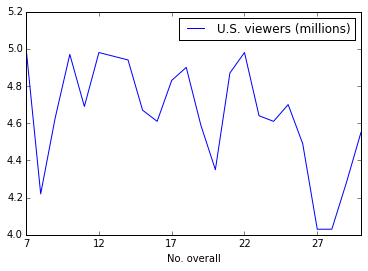

In [74]:
episode_list.ix[:,5:7].plot();

But what if we want to get really fancy? PyPlot has some really excellent features. We can append this stuff to the default figure 1.

In [75]:
plt.plot?

AttributeError: 'Series' object has no attribute 'rolling'

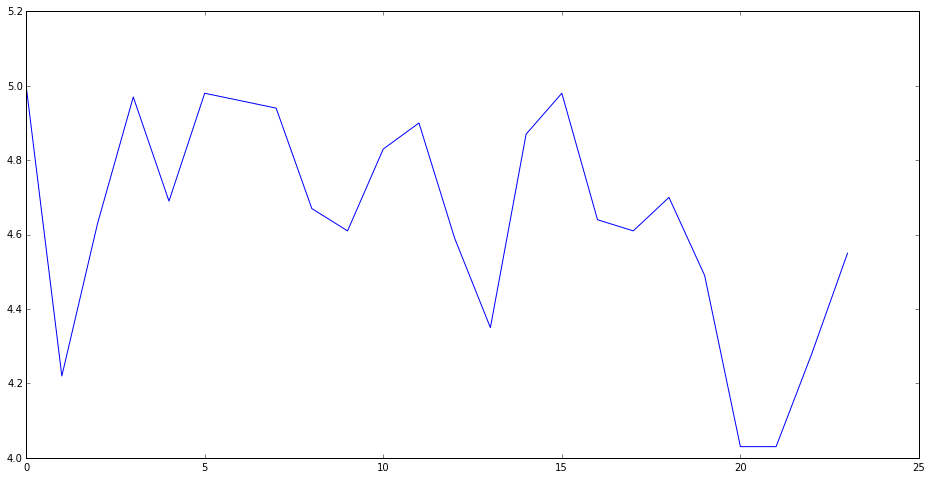

In [76]:
episode_titles = episode_list.ix[:,1].values
episode_viewers = episode_list.ix[:,5].values

index = np.arange(len(episode_list))

plt.figure(num=None, figsize=(16, 8), facecolor='w', edgecolor='k')
plt.plot(index, episode_viewers, color = 'b')
plt.plot(pd.Series(episode_viewers).rolling(window=3).mean(), 'r')
plt.ylabel('Viewers (in millions)')
plt.grid()
plt.xlabel('Episode Titles')
plt.title('Parks & Recreation Viewer Stats')
plt.xticks(index,episode_titles,rotation=90);
